# PA 3: Association Analysis - Apriori/FP Growth

# Introduction
The following project uses dataset which has transaction id's along with the items purchased. This project helps us to predict the most frequent itemsets and rules associated with them.

In [1]:
#Importing Libraries and Packages
'''
The following packages and libraries are imported.
1. matplotlib - Used for creating plots
2. time - Used to calculate time taken to run the algorithm
3. mlxtend - This library is imported in order to perform encoding on the dataset and also apply apriori,fp-growth algorithms 
and association rules.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules, fpgrowth

1.    Load the dataset (from the csv file)

In [2]:
# Reading the dataset and printing the dataset
df_data = pd.read_csv('dataset1.csv')
df_data

,Tid,items
0,0,"Bread, Corn, Dill, Ice cream, Sugar, Yogurt, c..."
1,1,"Milk,"
2,2,"Apple, Butter, Dill, Ice cream, Milk, Yogurt, ..."
3,3,"Butter, Cheese, Dill, Milk, Nutmeg, Onion,"
4,4,"Apple, Bread,"
...,...,...
994,994,"Bread, Eggs, Unicorn, chocolate,"
995,995,"Apple, Corn, Kidney Beans, Milk, Nutmeg, Yogurt,"
996,996,"Apple, Corn, Dill, Sugar, chocolate,"
997,997,"Butter, Cheese, Corn, Eggs, Ice cream, Kidney ..."


2.    Pre-process the dataset and provide a detailed explanation (such as Handling of null values, empty strings, unncessary trailing characters such as commas and white spaces)

In [3]:
#Preprocessing the Dataset
'''
Preprocessing the dataset is handled in two steps:
1. Handling Null and "Unknown" Values: First, we are checking for null values and unknown values in the dataset.
For the given dataset, there are no null values or unknown values. If there exists any, we need to either drop them or 
replace them with the mean value etc.
2. Handling Unneccessary Trailing Characters such as commas, whitespaces and also handling empty string: For handling these
scenarios, we have first split each row seperated by commans and then have removed whitespaces and commas using strip()
method. Next, we have removed the empty strings and have converted the given itemsets to list.

Preprocessing the dataset helps to be able to convert the dataset into binary transaction matrix which will be used to 
perform apriori and fp-growth algorithm.
'''

#Handling null values
print(df_data.isnull().sum(),end="\n")
print(df_data.isna().sum())
df_data.dropna(inplace=True)

Tid      0
items    0
dtype: int64
Tid      0
items    0
dtype: int64


In [4]:
#Handling unnecessary trailing characters such as commas and white spaces and also handling empty strings
'''
Handling Unneccessary Trailing Characters such as commas, whitespaces and also handling empty string: For handling these
scenarios, we have first split each row seperated by commans and then have removed whitespaces and commas using strip()
method. Next, we have removed the empty strings and have converted the given itemsets to list.
'''
index=0
for item in df_data['items']:
    item_list = item.split(',')
    for x in range(len(item_list)):
        item_list[x] = item_list[x].strip(', ')
    temp_list = []
    for i in item_list:
        if i != '':
            temp_list.append(i)
    item_list = temp_list
    df_data.at[index,'items'] = item_list
    index = index+1

df_data.head()

,Tid,items
0,0,"[Bread, Corn, Dill, Ice cream, Sugar, Yogurt, ..."
1,1,[Milk]
2,2,"[Apple, Butter, Dill, Ice cream, Milk, Yogurt,..."
3,3,"[Butter, Cheese, Dill, Milk, Nutmeg, Onion]"
4,4,"[Apple, Bread]"


3.    Encode the dataset

In [5]:
# Write your code here
'''
Encoding the Dataset:
We have used One-Hot Encoder (TransactionEncoder) to convert the dataset into binary transaction matrix.
The followed encoded dataset represents all the items from the dataset and True indicates if the item is present in that
specific transaction and False indicates that the item is not present in the respective transaction.
'''
items = df_data['items']
df_te = TransactionEncoder()
df_encoded_result = df_te.fit(items).transform(items)
cols_in_dt = df_te.columns_
encoded_dt = pd.DataFrame(df_encoded_result, columns=cols_in_dt)
encoded_dt

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


For each of the combinations in tasks 4 & 5, print the output in the following Sample format: 

- Support = 0.02
- Confidence = 0.1
- Total Number of Association Rules: 10
- Top 5 rules ordered by Confidence descending:
- Number of Maximal Sets: 5
- Number of Closed Sets: 5

4.	Execute Apriori algorithm and generate rules for 3 different combinations of support and confidence

In [6]:
'''
Apriori Algorithm:
We are calculating various metrics for three different combinations of Support and Confidence.
In this scenarios, the three combinations of Support and Confidence values are [0.02,0.2],[0.05,0.3] and [0.08,0.5]
We calculate:
1. Support
2. Confidence
3. Number of Association Rules
4. Top five Rules ordered by Confidence descending
5. Number of Maximal Sets
6. Number of Closed Sets

In this scenario, we are using for loop to iterate over three combinations of support and confidence. We apply the apriori
algorithm to the encoded dataset. And we generate association rules for the apriori itemsets. We calculate the 
time taken to calculate number of itemsets for each iteration and to perform the algorithm. These association rules are 
sorted according to their confidence values in descending order and the top five rules are printed for each combination of support and 
confidence.
'''

support_combination_values = [0.02,0.05,0.08]
confidence_combination_values = [0.2,0.3,0.5]
index = 0
time_taken_apriori = []
apriori_num_of_itemsets = []

for support_vals in support_combination_values:
    maximal_set=set()
    closed_itemsets = []
    start_time = time.time()
    freq_items_bought = apriori(encoded_dt,min_support=support_vals,use_colnames=True)
    apriori_num_of_itemsets.append(len(freq_items_bought))
    end_time = time.time()
    time_taken_apriori.append(end_time-start_time)
    item_rules = association_rules(freq_items_bought, metric = 'confidence', min_threshold = confidence_combination_values[index])
    print("Results obtained for Combination ",index+1,": ")
    print("Support : ", support_vals)
    print("Confidence: ",confidence_combination_values[index])
    print("Total Number of Association rules: ",len(item_rules))
    print("Top 5 rules ordered by Confidence descending: ")
    top_five_rules = pd.DataFrame(item_rules.sort_values(by='confidence',ascending = False).head(5))
    counter = 1
    for i,r in top_five_rules.iterrows():
        print("Rule ",counter,": ")
        print(set(r['antecedents']),'->',set(r['consequents']))
        print('Support = ',r['support'])
        print('Confidence =',r['confidence'])
        counter = counter+1  
    index = index+1
    print("\n")

Results obtained for Combination  1 : 
Support :  0.02
Confidence:  0.2
Total Number of Association rules:  66015
Top 5 rules ordered by Confidence descending: 
Rule  1 : 
{'Corn', 'Butter', 'Nutmeg', 'Milk', 'Bread'} -> {'Kidney Beans'}
Support =  0.021021021021021023
Confidence = 0.8750000000000001
Rule  2 : 
{'chocolate', 'Unicorn', 'Kidney Beans', 'Bread', 'Sugar'} -> {'Yogurt'}
Support =  0.02002002002002002
Confidence = 0.8333333333333334
Rule  3 : 
{'Nutmeg', 'Apple', 'Sugar', 'Unicorn'} -> {'Corn'}
Support =  0.031031031031031032
Confidence = 0.7948717948717949
Rule  4 : 
{'Apple', 'Corn', 'Kidney Beans', 'Cheese', 'Sugar'} -> {'Unicorn'}
Support =  0.022022022022022022
Confidence = 0.7857142857142857
Rule  5 : 
{'Nutmeg', 'Milk', 'Corn', 'Bread'} -> {'Kidney Beans'}
Support =  0.03303303303303303
Confidence = 0.7857142857142856


Results obtained for Combination  2 : 
Support :  0.05
Confidence:  0.3
Total Number of Association rules:  3083
Top 5 rules ordered by Confidence de

In [7]:
#Finding Maximal sets and Closed sets for the respective support and confidence combinations taken in previous step.
'''
Maximal Sets - An itemset is maximal set if it is frequent and none of its superset is frequent. This tells us that if 
an itemset is not a subset of another itemset, we can call it as an maximal set. 
In order to find the maximal sets, we are iterating over two for loops to check if itemset is an subset of its superset and 
a list is created to store if an itemset is maximal.

Closed Sets - An itemset is closed if none of its immediate supersets has the same support as the itemset.
In order to find the closed sets, we are iterating over two for loops to check if the itemset is subset of another itemset
and if their support count is equal. We are filtering the itemsets this matches the definition and a list is created to
store the itemsets that are closed.

As the dataset has multiple rows, the execution time to find the number of maximal sets and number of closed sets is higher
for various support combinations.

In order to overcome this, This program below prints the first five maximal and closed sets. To find the number of maximal
sets and closed sets, the code needs to uncommented and can run.
'''
support_combination_values = [0.02,0.05,0.08]
counter = 0
for support_vals in support_combination_values:
    print("Maximal and Closed sets for Combination ",counter+1,": ")
    maximal_set=set()
    closed_itemsets = []
    freq_items_bought = apriori(encoded_dt,min_support=support_vals,use_colnames=True)
    for it in freq_items_bought['itemsets']:
        check_is_maximal = True
        for su in freq_items_bought['itemsets']:
            if it != su and it.issubset(su):
                check_is_maximal = False
                break
        if check_is_maximal:
            maximal_set.add(it)
    print("Number of Maximal Sets: ",len(maximal_set))        

    for i,row in freq_items_bought.iterrows():
        check_closed_set = True
        for j,row_item in freq_items_bought.iterrows():
            temp_one = set(row['itemsets'])
            temp_two = set(row_item['itemsets'])
            if temp_one!=temp_two and (temp_one.issubset(temp_two)) and row['support'] == row_item['support']:
                check_closed_set = False
                break
        if check_closed_set == True:
            closed_itemsets.append(row['itemsets'])
    print("Number of Closed Sets: ",len(closed_itemsets))  
    counter = counter+1
    print("\n")

Maximal and Closed sets for Combination  1 : 
Number of Maximal Sets:  2964
Number of Closed Sets:  5545


Maximal and Closed sets for Combination  2 : 
Number of Maximal Sets:  468
Number of Closed Sets:  947


Maximal and Closed sets for Combination  3 : 
Number of Maximal Sets:  479
Number of Closed Sets:  615




5.    Execute FP Growth algorithm and generate rules for 3 different combinations of support and confidence

In [8]:
# Write your code here
'''
FP-Growth Algorithm:
We are calculating various metrics for three different combinations of Support and Confidence.
In this scenarios, the three combinations of Support and Confidence values are [0.02,0.2],[0.05,0.3] and [0.08,0.5]
We calculate:
1. Support
2. Confidence
3. Number of Association Rules
4. Top five Rules ordered by Confidence descending
5. Number of Maximal Sets
6. Number of Closed Sets

In this scenario, we are using for loop to iterate over three combinations of support and confidence. We apply the fpgrowth
algorithm to the encoded dataset. And we generate association rules for the fpgrowth itemsets that are generated. We 
calculate the time taken to calculate number of itemsets for each iteration and to perform the algorithm. These 
association rules are sorted according to their confidence values in descending order and the top five rules are printed 
for each combination of support and confidence.

We can observe that both apriori and fpgrowth algorithms yields same results for the respective combinations taken for test.
'''
support_combination_values = [0.02,0.05,0.08]
confidence_combination_values = [0.2,0.3,0.5]
index = 0
time_taken_fp = []
fp_num_of_itemsets = []
for support_vals in support_combination_values:
    start_time = time.time()
    fp_freq_items_bought = fpgrowth(encoded_dt, min_support=support_vals, use_colnames = True)
    fp_num_of_itemsets.append(len(fp_freq_items_bought))
    end_time = time.time()
    time_taken_fp.append(end_time-start_time)
    assoc_rules_fp = association_rules(fp_freq_items_bought, metric = "confidence", min_threshold = confidence_combination_values[index])
    top_five_rules = pd.DataFrame(assoc_rules_fp.sort_values(by='confidence',ascending = False).head(5))
    counter = 1
    print("Support : ", support_vals)
    print("Confidence: ",confidence_combination_values[index])
    print("Total Number of Association rules: ",len(assoc_rules_fp))
    print("Top 5 rules ordered by Confidence descending: ")
    for i,r in top_five_rules.iterrows():
        print("Rule ",counter,": ")
        print(set(r['antecedents']),'->',set(r['consequents']))
        print('Support = ',r['support'])
        print('Confidence =',r['confidence'])
        counter = counter+1   
    index = index+1
    print("\n")

Support :  0.02
Confidence:  0.2
Total Number of Association rules:  66015
Top 5 rules ordered by Confidence descending: 
Rule  1 : 
{'Corn', 'Butter', 'Nutmeg', 'Milk', 'Bread'} -> {'Kidney Beans'}
Support =  0.021021021021021023
Confidence = 0.8750000000000001
Rule  2 : 
{'chocolate', 'Unicorn', 'Kidney Beans', 'Bread', 'Sugar'} -> {'Yogurt'}
Support =  0.02002002002002002
Confidence = 0.8333333333333334
Rule  3 : 
{'Nutmeg', 'Apple', 'Sugar', 'Unicorn'} -> {'Corn'}
Support =  0.031031031031031032
Confidence = 0.7948717948717949
Rule  4 : 
{'Apple', 'Corn', 'Kidney Beans', 'Cheese', 'Sugar'} -> {'Unicorn'}
Support =  0.022022022022022022
Confidence = 0.7857142857142857
Rule  5 : 
{'Nutmeg', 'Milk', 'Corn', 'Bread'} -> {'Kidney Beans'}
Support =  0.03303303303303303
Confidence = 0.7857142857142856


Support :  0.05
Confidence:  0.3
Total Number of Association rules:  3083
Top 5 rules ordered by Confidence descending: 
Rule  1 : 
{'Dill', 'Milk', 'Unicorn'} -> {'chocolate'}
Support =  

In [14]:
#Finding Maximal sets and Closed sets for the respective support and confidence combinations taken in previous step.
'''
Maximal Sets - An itemset is maximal set if it is frequent and none of its superset is frequent. This tells us that if 
an itemset is not a subset of another itemset, we can call it as an maximal set. 
In order to find the maximal sets, we are iterating over two for loops to check if itemset is an subset of its superset and 
a list is created to store if an itemset is maximal.

Closed Sets - An itemset is closed if none of its immediate supersets has the same support as the itemset.
In order to find the closed sets, we are iterating over two for loops to check if the itemset is subset of another itemset
and if their support count is equal. We are filtering the itemsets this matches the definition and a list is created to
store the itemsets that are closed.

As the dataset has multiple rows, the execution time to find the number of maximal sets and number of closed sets is higher
for various support combinations.

In order to overcome this, This program below prints the first five maximal and closed sets. To find the number of maximal
sets and closed sets, the code needs to uncommented and can run.
'''
support_combination_values = [0.02,0.05,0.08]
counter = 0

for support_vals in support_combination_values:
    print("Maximal and Closed sets for Combination ",counter+1,": ")
    maximal_set=set()
    closed_itemsets = []
    fp_freq_items_bought = fpgrowth(encoded_dt,min_support=support_vals,use_colnames=True)
    for it in fp_freq_items_bought['itemsets']:
        check_is_maximal = True
        for su in fp_freq_items_bought['itemsets']:
            if it != su and it.issubset(su):
                check_is_maximal = False
                break
        if check_is_maximal:
            maximal_set.add(it)
    print("Number of Maximal Sets: ",len(maximal_set))        
    print("\n")
    for i,row in fp_freq_items_bought.iterrows():
        check_closed_set = True
        for j,row_item in fp_freq_items_bought.iterrows():
            temp_one = set(row['itemsets'])
            temp_two = set(row_item['itemsets'])
            if temp_one!=temp_two and (temp_one.issubset(temp_two)):
                if row['support'] == row_item['support']:
                    check_closed_set = False
                    break
        if check_closed_set == True:
            closed_itemsets.append(row['itemsets'])
    print("Number of Closed Sets: ",len(closed_itemsets))  
    counter = counter+1
    print("\n")

Maximal and Closed sets for Combination  1 : 
Number of Maximal Sets:  2964


Number of Closed Sets:  5545


Maximal and Closed sets for Combination  2 : 
Number of Maximal Sets:  468


Number of Closed Sets:  947


Maximal and Closed sets for Combination  3 : 
Number of Maximal Sets:  479


Number of Closed Sets:  615




6.	Plot the following graphs comparing both the algorithms:
    - time vs minimum support
    - time vs number of itemsets

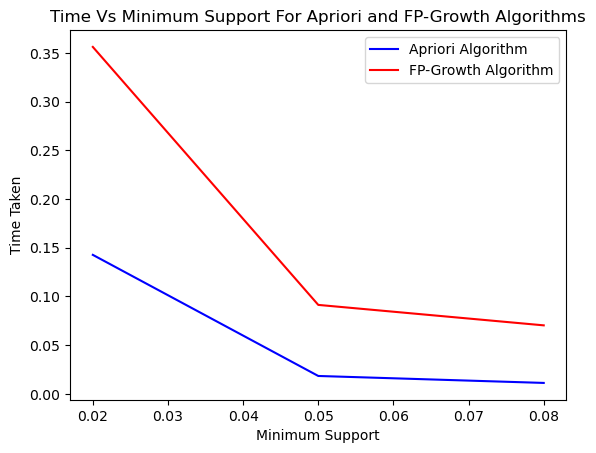

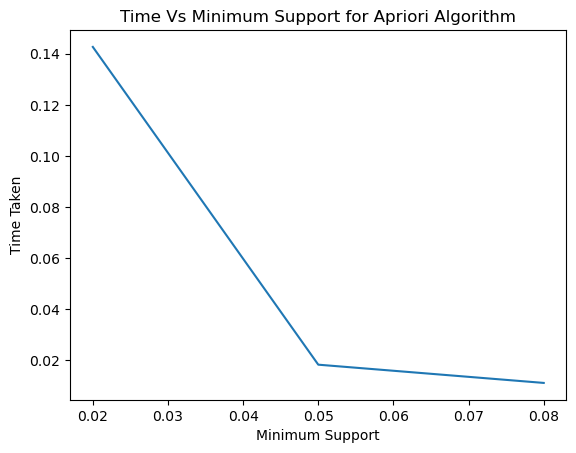

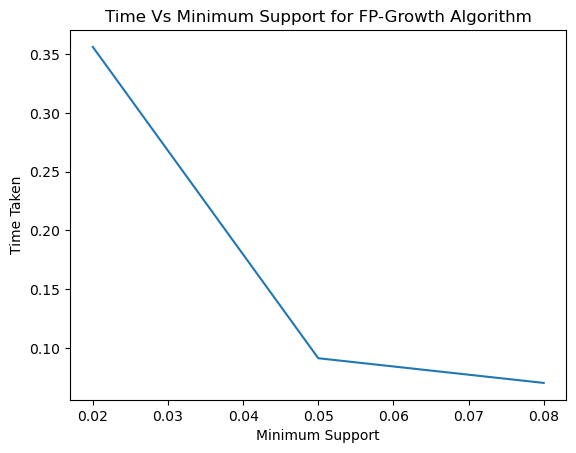

In [10]:
'''
Time Vs Minimum Support :

Two plots have been created which represents time vs minimum support. The first plot represents the three support values
that was taken in tasks 4 and tasks 5. The second plot shows how the time various across a set of support values.

Plot 1:
The time taken to perform the algorithm which was calculated in previous tasks is now used to plot the graph for 
both apriori and fp growth algorithms.

The first plot contains both algorithms together.
The second plot contains plot for apriori algorithm.
The third plot contains plot for fpgrowth algorithm.
'''
min_support_list = [0.02,0.05,0.08]

plt.plot(min_support_list,time_taken_apriori,label="Apriori Algorithm",color="blue")
plt.plot(min_support_list,time_taken_fp,label="FP-Growth Algorithm",color="red")
plt.xlabel("Minimum Support")
plt.ylabel("Time Taken")
plt.title("Time Vs Minimum Support For Apriori and FP-Growth Algorithms")
plt.legend()
plt.show()    
    
plt.plot(min_support_list,time_taken_apriori)
plt.xlabel("Minimum Support")
plt.ylabel("Time Taken")
plt.title("Time Vs Minimum Support for Apriori Algorithm")
plt.show()

plt.plot(min_support_list,time_taken_fp)
plt.xlabel("Minimum Support")
plt.ylabel("Time Taken")
plt.title("Time Vs Minimum Support for FP-Growth Algorithm")
plt.show()

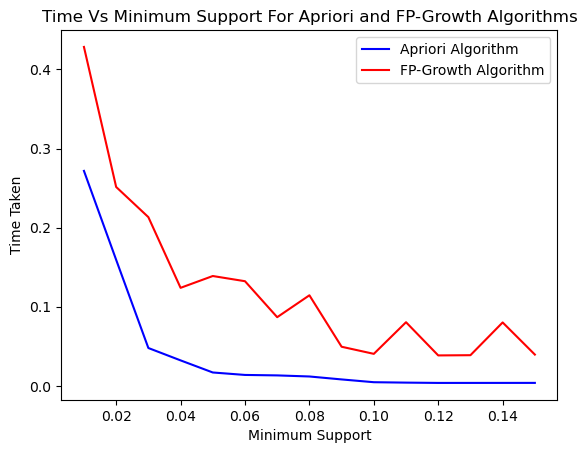

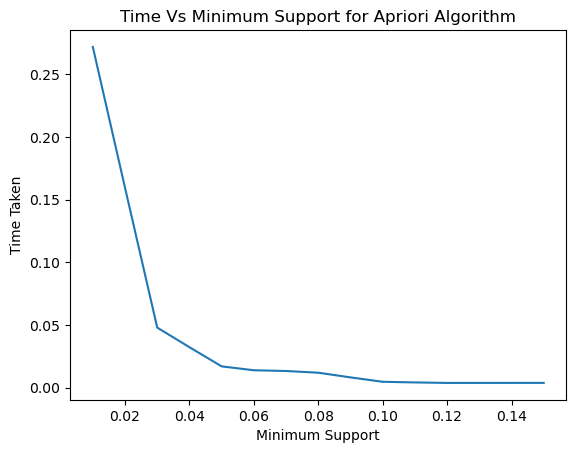

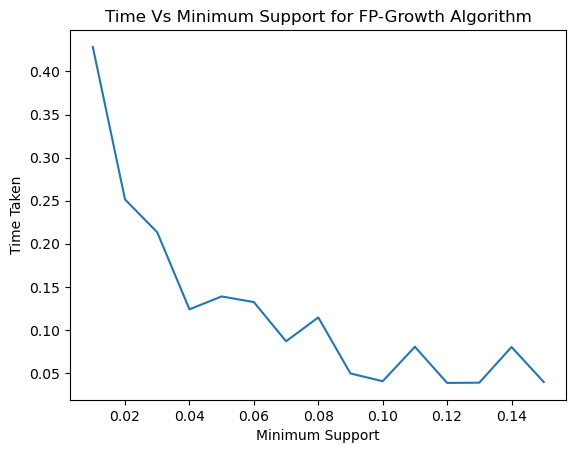

In [11]:
'''
Time Vs Minimum Support :
Plot 2:
The time taken to perform the algorithm is calculated for various support values for both apriori and fpgrowth algorithms.

The first plot represents plot for both the algorithms.
The second plot represents plot for Apriori algorithm.
The third plot represents plot for FpGrowth algorithm.
'''
min_support_list = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15]
time_taken_list_apriori = []
time_taken_list_fp = []
for support_val in min_support_list:
    st = time.time()
    freq_items_bought = apriori(encoded_dt,min_support=support_val,use_colnames=True)
    et = time.time()
    time_taken_list_apriori.append(et-st)
    
    st = time.time()
    freq_items_bought = fpgrowth(encoded_dt,min_support=support_val,use_colnames=True)
    et = time.time()
    time_taken_list_fp.append(et-st)

plt.plot(min_support_list,time_taken_list_apriori,label="Apriori Algorithm",color="blue")
plt.plot(min_support_list,time_taken_list_fp,label="FP-Growth Algorithm",color="red")
plt.xlabel("Minimum Support")
plt.ylabel("Time Taken")
plt.title("Time Vs Minimum Support For Apriori and FP-Growth Algorithms")
plt.legend()
plt.show()    
    
plt.plot(min_support_list,time_taken_list_apriori)
plt.xlabel("Minimum Support")
plt.ylabel("Time Taken")
plt.title("Time Vs Minimum Support for Apriori Algorithm")
plt.show()

plt.plot(min_support_list,time_taken_list_fp)
plt.xlabel("Minimum Support")
plt.ylabel("Time Taken")
plt.title("Time Vs Minimum Support for FP-Growth Algorithm")
plt.show()

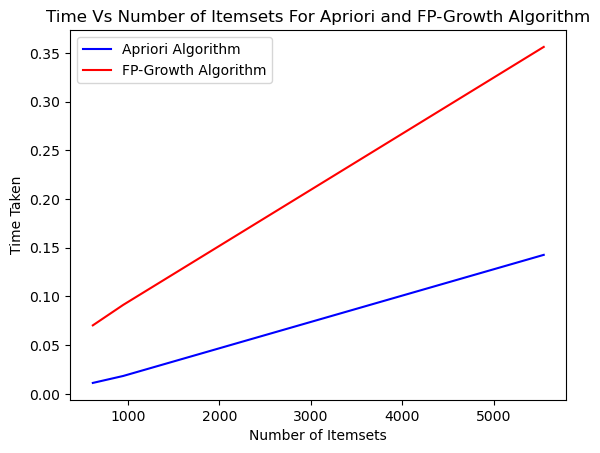

In [12]:
'''
Time Vs Number of Itemsets :
Plot 1:
The time taken to perform the algorithm and number of itemsets for each iteration which was calculated in previous tasks 
is now used to plot the graph for both apriori and fp growth algorithms.

The plot represents both the algorithms together.
The blue color indicates Time Vs Number of Itemsets plot for Apriori Algorithm
The red color indicates Time Vs Number of Itemsets plot for FP-Growth Algorithm
'''
plt.plot(apriori_num_of_itemsets,time_taken_apriori,label="Apriori Algorithm",color="blue")
plt.plot(fp_num_of_itemsets,time_taken_fp,label="FP-Growth Algorithm",color="red")
plt.xlabel("Number of Itemsets")
plt.ylabel("Time Taken")
plt.title("Time Vs Number of Itemsets For Apriori and FP-Growth Algorithm")
plt.legend()
plt.show()

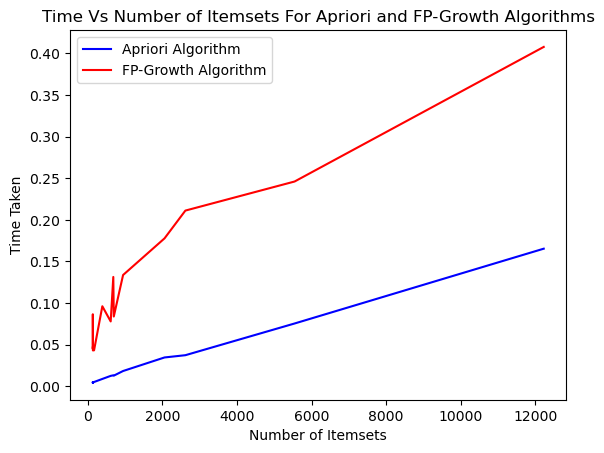

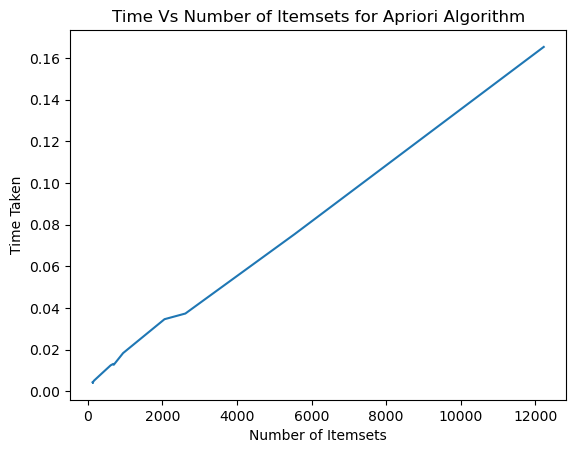

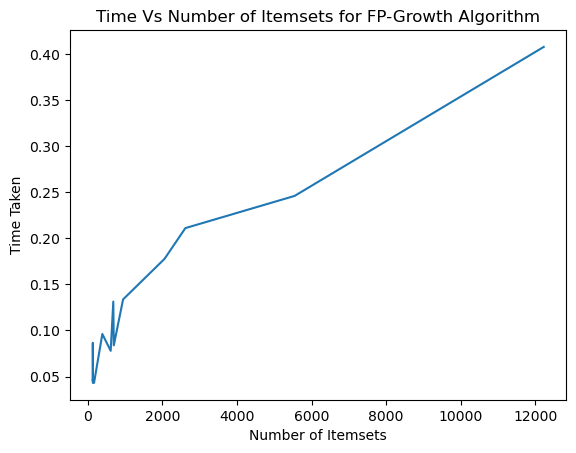

In [13]:
'''
Time Vs Number of Itemsets :
Plot 2:
The time taken to find number of itemsets is calculated for various support values. Three graphs are plotted where:

The first plot represent plot for both the algorithms together.
The second plot represents plot for Apriori algorithm.
The third plot represents plot for FP-Growth algorithm.

'''
min_support_list = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15]
time_taken_list_apriori = []
time_taken_list_fp = []
num_of_itemsets_apriori = []
num_of_itemsets_fp = []
for support_val in min_support_list:
    st = time.time()
    freq_items_bought = apriori(encoded_dt,min_support=support_val,use_colnames=True)
    num_of_itemsets_apriori.append(len(freq_items_bought))
    et = time.time()
    time_taken_list_apriori.append(et-st)
    
    
    st = time.time()
    freq_items_bought = fpgrowth(encoded_dt,min_support=support_val,use_colnames=True)
    num_of_itemsets_fp.append(len(freq_items_bought))
    et = time.time()
    time_taken_list_fp.append(et-st)
    
plt.plot(num_of_itemsets_apriori,time_taken_list_apriori,label="Apriori Algorithm",color="blue")
plt.plot(num_of_itemsets_fp,time_taken_list_fp,label="FP-Growth Algorithm",color="red")
plt.xlabel("Number of Itemsets")
plt.ylabel("Time Taken")
plt.title("Time Vs Number of Itemsets For Apriori and FP-Growth Algorithms")
plt.legend()
plt.show()    
    
plt.plot(num_of_itemsets_apriori,time_taken_list_apriori)
plt.xlabel("Number of Itemsets")
plt.ylabel("Time Taken")
plt.title("Time Vs Number of Itemsets for Apriori Algorithm")
plt.show()

plt.plot(num_of_itemsets_fp,time_taken_list_fp)
plt.xlabel("Number of Itemsets")
plt.ylabel("Time Taken")
plt.title("Time Vs Number of Itemsets for FP-Growth Algorithm")
plt.show()

7.    Explain the insights that you got from the graphs. Which algorithm worked better and what do you believe is the reason?

<b>Two plots are plotted for both the graphs.</b>

<b>For Time Vs Minimum Support Graph:</b><br/>
The first graph represent the support values that were chosen to play with in tasks 4 and task 5.<br/>
The second graph represents the various support values that were chosen for plotting the graph.<br/><br/>

From both the graphs, we can say that:<br/>
In apriori algorithm, we can see that the time taken decreases as the minimum support values increases.<br/>
In fp-growth algorithm, we can see that the time taken fluctuates as the minimum support values increases.<br/><br/>

By this we can say that apriori algorithm works better in terms of time complexity. I would believe apriori algorithm is best
because it might execute faster for higher minimum support values which makes the algorithm more efficient. Whereas in case 
of fpgrowth algorithm, we cant predict its execution time based on the minimum support value.<br/><br/>

<b>For Time Vs Number of Itemsets Graph:</b><br/>
The first graph represent the support values that were chosen to play with in tasks 4 and task 5.<br/>
The second graph represents the various support values that were chosen for plotting the graph.<br/><br/>

From both the graphs, we can say that:<br/>
Both apriori and fpgrowth algorithms follow similar trend, as the time taken increases as the number of itemsets increases for
various minimum support values.<br/>

By this we can say that both algorithm follow similar trend in terms of time complexity. But we know that fpgrowth algorithm runtime process increases linearly with increase in number of itemsets whereas in apriori algorithm, the process is comparitevely slower the runtime increases exponentially with increase in number of itemsets. Therefore I believe FP-Growth performs better in this scenario.

# Sources
https://www.kaggle.com/code/keitazoumana/comparative-analysis-between-apriori-and-fp-growth<br/>
https://www.javatpoint.com/apriori-algorithm-in-machine-learning<br/>
https://www.javatpoint.com/fp-growth-algorithm-in-machine-learning<br/>
https://www.kaggle.com/code/rockystats/apriori-algorithm-or-market-basket-analysis<br/>